Ejr:

Sea S la porción del cono $z=\sqrt{x^2+y^2}$ con $z\le 1$. Una lámina dada por $S$ y su densidad en cada punto es igual a la altura del punto respecto al plano $z=0$. 

(a)  Respresenta la superficie $S$ empleando las parametrizacones
$$
x=r\cos(t),\, y=r\sin(t), \, z=r
$$

(b) Encontrar la densidad media de la lámina

(c) Determinar y representar sobre la superficie, el lugar geométrico de los puntos de la lámina que tienen una densidad igual a la densidad media. 

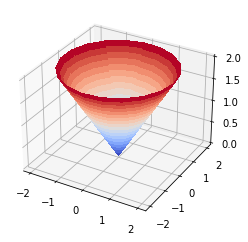

In [2]:
import numpy as np
th=np.linspace(0, np.pi*2,20)
r=np.linspace(0,2,20)
Th,R=np.meshgrid(th,r)
X=R*np.cos(Th);Y=R*np.sin(Th)
Z=R*np.ones_like(X)

import matplotlib.pyplot as plt
from matplotlib import cm

fig1, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

plt.show()

$z=\sqrt{x^2+y^2}=g(x,y)$



$$
A= \int \int_S 1 \, dS = \int \int_D \sqrt{1 + (g_x)^2 + (g_y)^2} dx\, dy \mbox{  porque } z=g(x,y)
$$

La integral se resuelve mediante cambio a coordenadas polares $x=r\cos(theta)$,  $y=r\sin(theta)$


La densidad total es:

$$
\rho_{t}= \int \int_S \rho(x,y,z)dS= \int \int_D \rho(x,y,z) \sqrt{1 + (g_x)^2 + (g_y)^2} dx\, dy \mbox{  porque } z=g(x,y)
$$


$\rho(x,y,z)=z$

Haciendo cambio a coordenadas polares $x=r\cos(\theta)$,  $y=r\sin(\theta)$

La densidad media es:

$$
\rho_{med}=\frac{\rho_t}{A}
$$

In [13]:
#TEngo que mirar las cuentas que salen a mano...

import sympy as sp
x,y,z=sp.symbols('x,y,z')
g=sp.sqrt(x**2+y**2)
gx=sp.diff(g,x);gy=sp.diff(g,y)

r,t=sp.symbols('r,t')
f=sp.sqrt(1+gx**2+gy**2)
f=sp.simplify(f)
print("f= ", f)

f=f.subs([ (x,r*sp.cos(t)),(y,r*sp.sin(t)) ])
h=f*r
print(h)
h=sp.simplify(h)
A=sp.integrate(h, (t,0.,sp.pi*2), (r,0,1)) #NO es capaz de hacer la integral  
print("Area= ", A.evalf())

#Directamente con Scipy
from scipy.integrate import quad
h1=sp.lambdify((t,r),h)

from scipy import integrate
A,e= integrate.nquad(h1, [[0,np.pi*2], [0,1] ]) 
print("A= ", A)

f=  sqrt(2)
sqrt(2)*r
Area=  4.44288293815837
A=  4.442882938158367


In [18]:
#Densidad total
ro=z

f=ro*sp.sqrt(1+gx**2+gy**2)
f=sp.simplify(f)
f=f.subs([ (x,r*sp.cos(t)),(y,r*sp.sin(t)),(z,r) ])
h=f*r
print(h)
h=sp.simplify(h)
ro_total=sp.integrate(h, (t,0.,sp.pi*2), (r,0,1)) #NO es capaz de hacer la integral  
print("Densidad total= ", ro_total.evalf())

ro_media=ro_total/A
print("Densidad media= ", ro_media)

sqrt(2)*r**2
Densidad total=  2.96192195877224
Densidad media=  0.150052719359518*sqrt(2)*pi
